In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.time_series import stationarity_tester
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KN


In [2]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [4]:
stasiun_1_intrp = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Dataset\\Processed\\time series\\stasiun_1_intrp.csv')

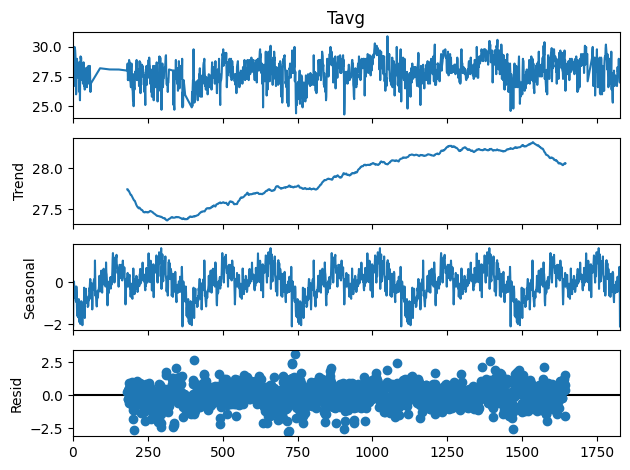

In [5]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['Tavg'] ,period = 365,model = 'additive').plot()
plt.show()

In [6]:
stationarity_tester(stasiun_1_intrp['Tavg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.746984,0.000069,-3.433976,-2.863142,-2.567623,True
KPSS,1.260038,0.01,0.739,0.463,0.347,True


In [7]:
data_diff_T = stasiun_1_intrp['Tavg'].diff()
data_diff_T = data_diff_T.fillna(data_diff_T.median())

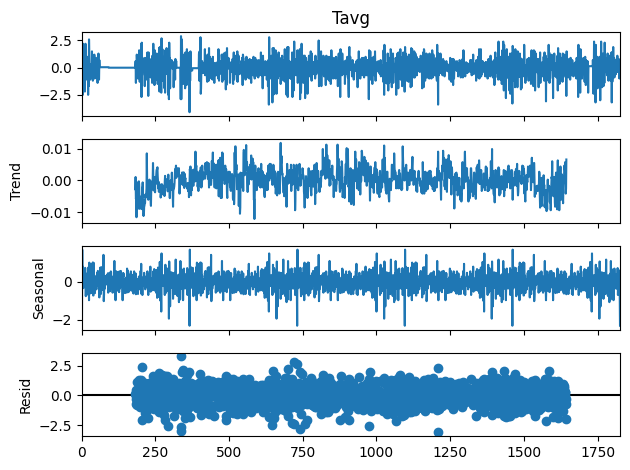

In [8]:
dec = sm.tsa.seasonal_decompose(data_diff_T ,period = 365,model = 'additive').plot()
plt.show()

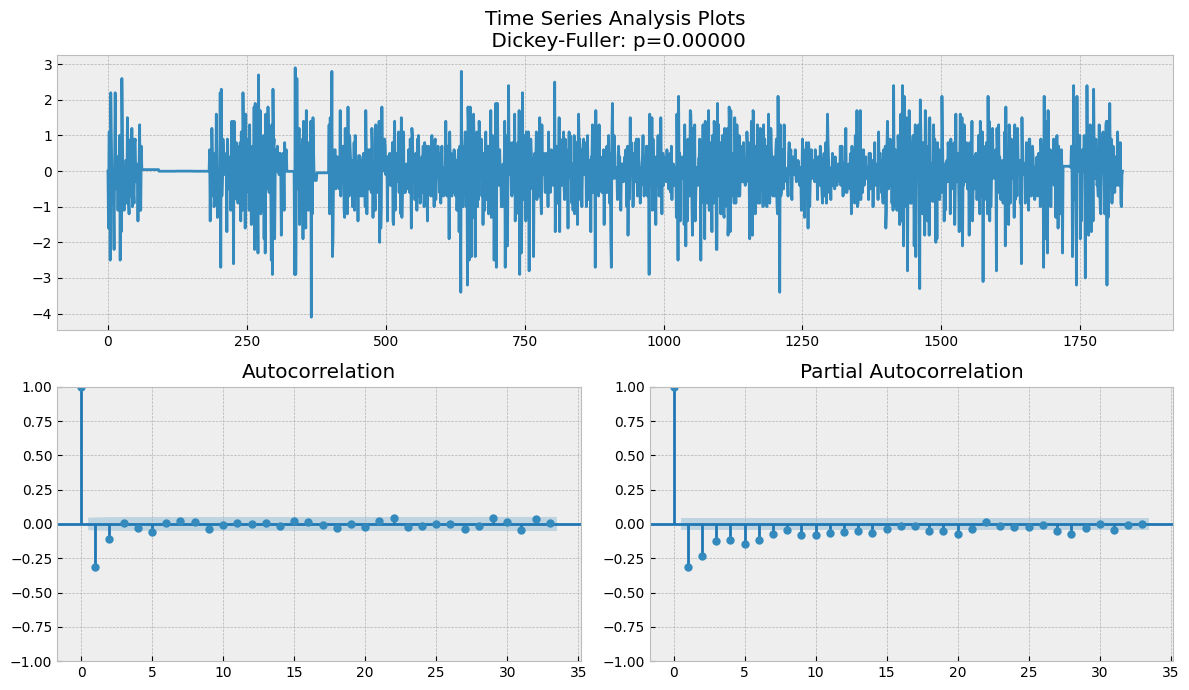

In [9]:
tsplot(data_diff_T)

In [10]:
data_diff_seas_T = data_diff_T.diff(356)
data_diff_seas_T = data_diff_seas_T.fillna(data_diff_T.median())

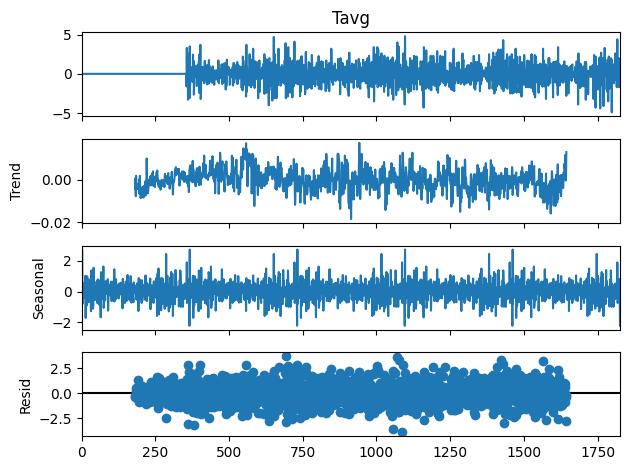

In [11]:
dec = sm.tsa.seasonal_decompose(data_diff_seas_T ,period = 365,model = 'additive').plot()
plt.show()

In [12]:
stationarity_tester(data_diff_seas_T)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-13.325648,0.0,-3.433984,-2.863145,-2.567625,True
KPSS,0.120169,0.1,0.739,0.463,0.347,False


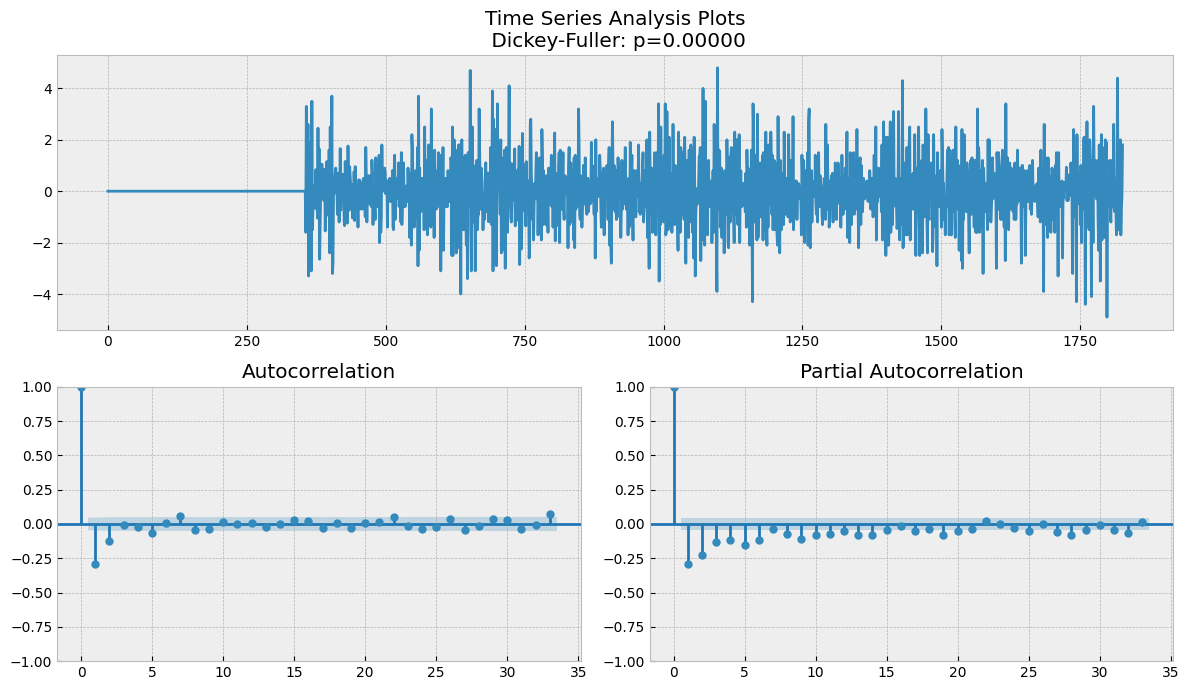

In [13]:
tsplot(data_diff_seas_T)

In [14]:
import numpy as np

In [15]:
stasiun_1_intrp.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [16]:
stasiun_1_intrp['date'] = pd.to_datetime(stasiun_1_intrp['date'])

In [17]:
stasiun_1_intrp.set_index('date', inplace=True)

In [18]:
stasiun1_weekly = stasiun_1_intrp.resample('W').mean()

In [19]:
train_data = stasiun1_weekly['Tavg'][:len(stasiun1_weekly)-52]
test_data = stasiun1_weekly['Tavg'][len(stasiun1_weekly)-52:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 2, 52))
model_fit = model.fit()

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error: 0.5664762721688268


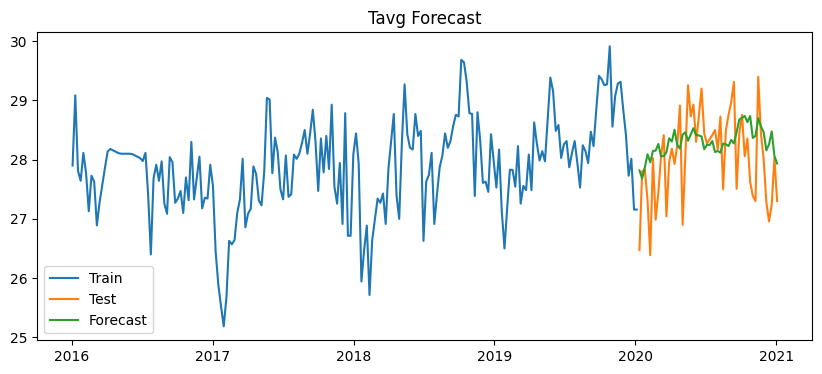

In [23]:
forecast = model_fit.forecast(steps = 52)

mae = mean_absolute_error(test_data, forecast)
print('Mean Absolute Error:', mae)

fig = plt.figure(figsize=(10,4))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Tavg Forecast')
plt.legend()
plt.show()

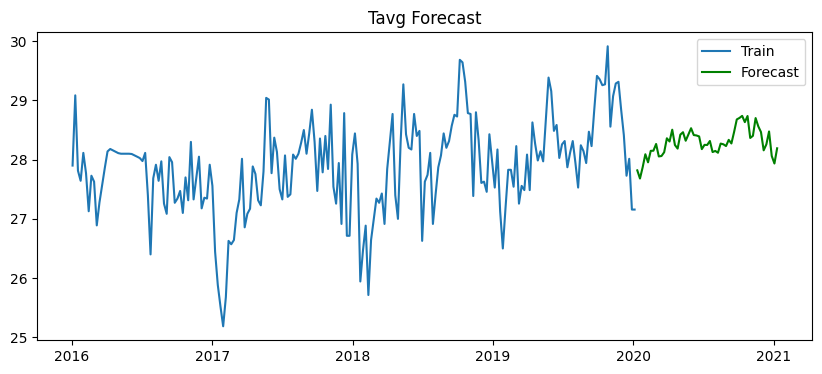

In [24]:
recast = model_fit.forecast(steps = 53)
fig = plt.figure(figsize=(10,4))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(recast.index, recast, label='Forecast', color='green')
plt.title('Tavg Forecast')
plt.legend()
plt.show()